In [129]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

plt.style.use('fivethirtyeight')

data_path = Path('Full Output.csv')
data = pd.read_csv(data_path)

clientdata = ( data.loc[:, 
                        ['AGI', 'BirthYear', 'CardDisb', 'Channel', 'Corporate', 'DependentCount', 
                         'EarlyFilerSNS', 'FederalRefund', 'Funded', 'IRS_Acknowledged',
                        'NewClient', 'PYDebt', 'ReferaFriend',
                        ]
                      ])

formsdata = ( data.loc[:, 
                        ['Funded',
                        'FedForm_5', 'FedForm_6', 'FedForm_8', 'FedForm_13', 'FedForm_17', 'FedForm_19', 'FedForm_21', 'FedForm_22', 
                        'FedForm_25', 'FedForm_26', 'FedForm_27', 'FedForm_28', 'FedForm_37', 'FedForm_43', 'FedForm_55', 'FedForm_78', 
                        'FedForm_90', 'FedForm_91', 'FedForm_93', 'FedForm_101', 'FedForm_102', 'FedForm_105', 'FedForm_106', 'FedForm_107', 
                        'FedForm_111', 'FedForm_113', 'FedForm_116', 'FedForm_121', 'FedForm_123', 'FedForm_124', 'FedForm_126', 'FedForm_127', 
                        'FedForm_129', 'FedForm_130', 'FedForm_132', 'FedForm_133', 'FedForm_140', 'FedForm_146', 'FedForm_148', 'FedForm_150',
                        'FedForm_152', 'FedForm_153']
                      ])


formsdataplot = formsdata.drop(['Funded'], axis=1)

gooddata = ( data.loc[:, 
                        ['Funded',
                         'IRS_Acknowledged', 'FederalRefund', 'DependentCount', 
                         'EarlyFilerSNS', 'AGI', 'CardDisb', 'PYDebt', 'NewClient',
                         'FedForm_5', 'FedForm_21', 'FedForm_140', 'FedForm_150', 'FedForm_22', 'FedForm_8',
                        ]
                      ])

feature_cols = [
                             'IRS_Acknowledged', 'FederalRefund', 'DependentCount', 
                         'EarlyFilerSNS', 'AGI', 'CardDisb', 'PYDebt', 'NewClient',
                         'FedForm_5', 'FedForm_21', 'FedForm_140', 'FedForm_150', 'FedForm_22', 'FedForm_8',
                ]

x = gooddata.loc[:,feature_cols]
y = gooddata.loc[:,'Funded']

x_train, x_test, y_train, y_test = train_test_split(x,y)

tree = DecisionTreeClassifier(max_depth=5, random_state=1)
tree.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

#    
# Problem: 
A large share of company revenue is determined by whether each client's tax return is funded by the IRS.    
Because IRS funding occurs weeks (to months) after filing a tax return, accurately projecting company revenue is difficult.
#  

#     
# Goal: 
Predict which tax returns will be funded by the IRS using:
- client information; and 
- Federal tax forms.
#  

#     
# Metrics: 

In [130]:
print('Sample Size      : ',len(data))
print('IRS Funding Rate : ',data.loc[:,'Funded'].mean())

Sample Size      :  1074044
IRS Funding Rate :  0.9215320787602742


#   
#### Client information has 12 fields, with both numeric and categorical variables:
- Numeric: expected Federal refund, adjusted gross income, birth year, and dependent count.
- Categorical: office type, client type, early filers, IRS acknowledged, previous debt, referral, card disbursement.

In [131]:
clientdata.head()

,AGI,BirthYear,CardDisb,Channel,Corporate,DependentCount,EarlyFilerSNS,FederalRefund,Funded,IRS_Acknowledged,NewClient,PYDebt,ReferaFriend
0,13318.0,1995,1,0,0,1,0,5749.0,1,1,1,0,0
1,12730.0,1951,0,0,0,0,0,1379.0,1,1,0,0,0
2,15168.0,1984,0,2,0,2,0,6173.0,1,1,0,0,0
3,18093.0,1995,0,2,0,1,0,4676.0,1,1,1,0,0
4,7069.0,1993,1,0,1,2,0,3487.0,1,1,0,0,0


#   
#### Forms data has 42 binary fields (values of 0 or 1), indicating whether a form is present on each tax return.   
Each form had at least 10,000 occurrences, covering 1% of the data set (at a minimum).

In [132]:
formsdata.head()

,Funded,FedForm_5,FedForm_6,FedForm_8,FedForm_13,FedForm_17,FedForm_19,FedForm_21,FedForm_22,FedForm_25,...,FedForm_129,FedForm_130,FedForm_132,FedForm_133,FedForm_140,FedForm_146,FedForm_148,FedForm_150,FedForm_152,FedForm_153
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Return Counts by Federal form

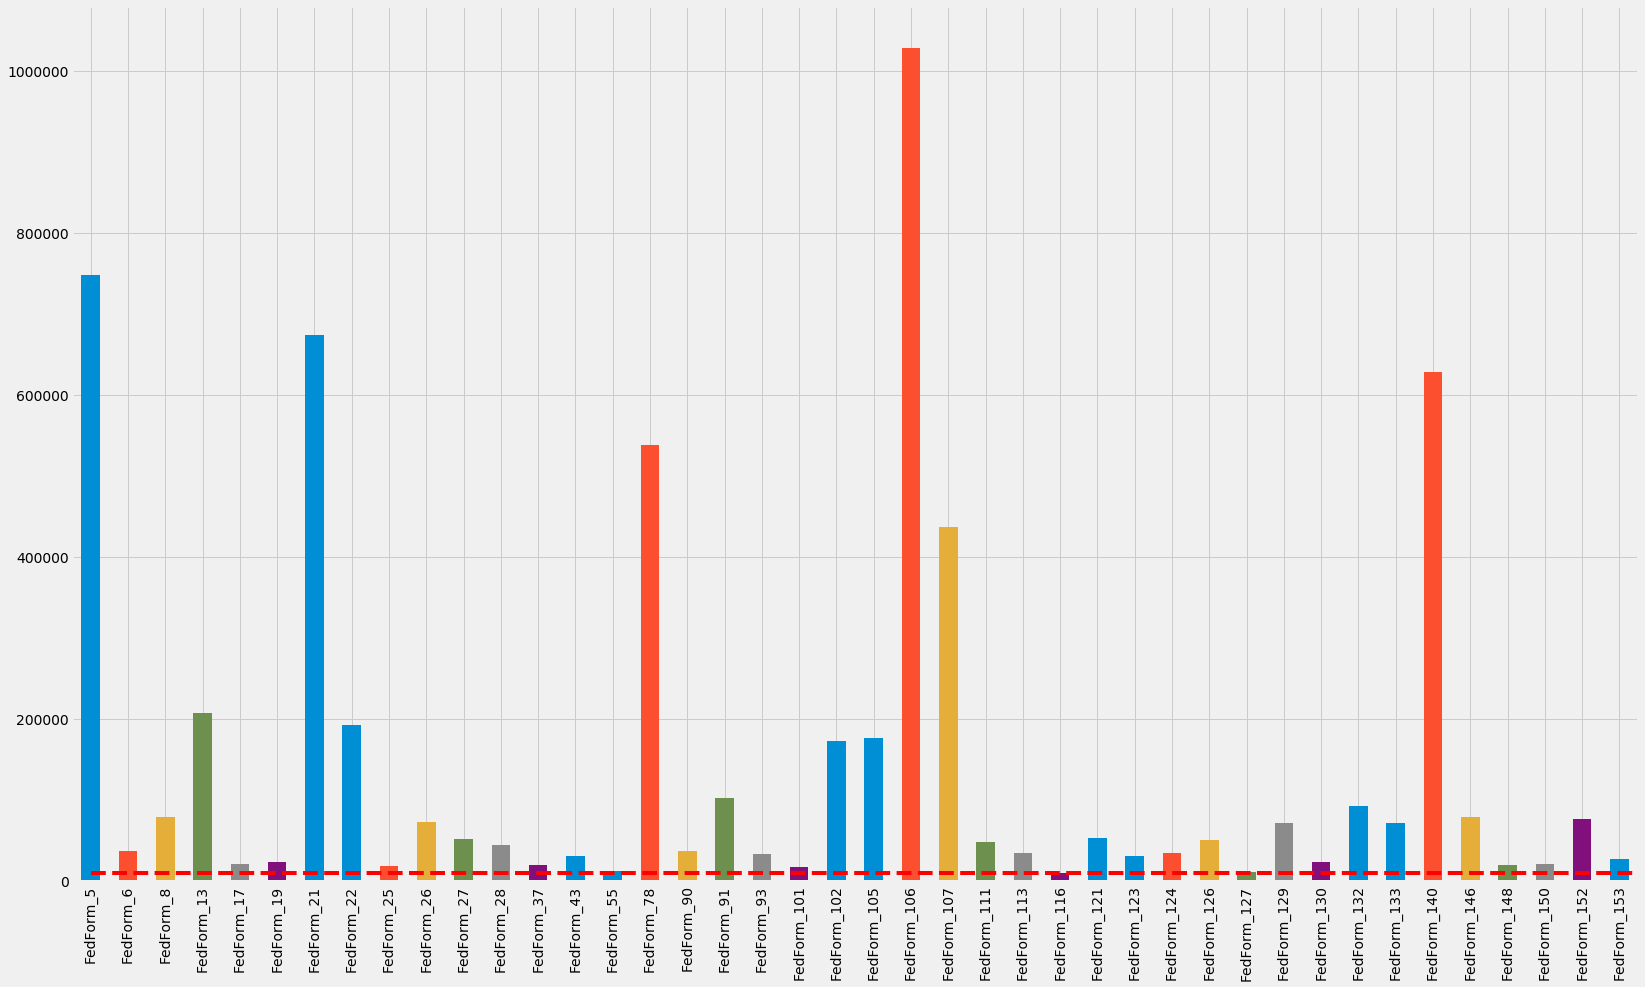

In [133]:
ax = np.sum(formsdataplot).plot(kind='bar', figsize = (25,15))
ax = plt.plot([0, 42], [10000,10000], 'r--')

#   
# Approach: 
#   

#### (1) Identify which features correlate with IRS funding

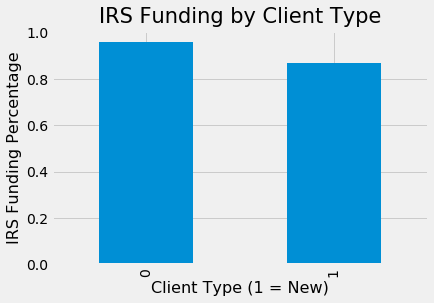

In [134]:
fundedclientnew = data.loc[:, ['Funded','NewClient']]
ax = fundedclientnew.groupby('NewClient').mean().plot(kind='bar')
ax.set_title('IRS Funding by Client Type', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Client Type (1 = New)', fontsize=16);
ax.get_legend().remove()

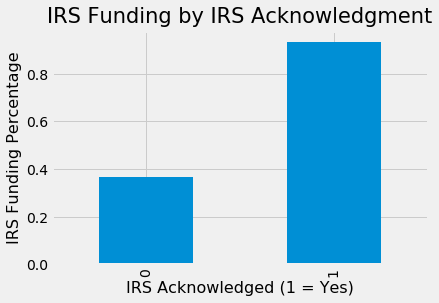

In [135]:
irsack = data.loc[:, ['Funded','IRS_Acknowledged']]
ax = irsack.groupby('IRS_Acknowledged').mean().plot(kind='bar')
ax.set_title('IRS Funding by IRS Acknowledgment', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('IRS Acknowledged (1 = Yes)', fontsize=16);
ax.get_legend().remove()

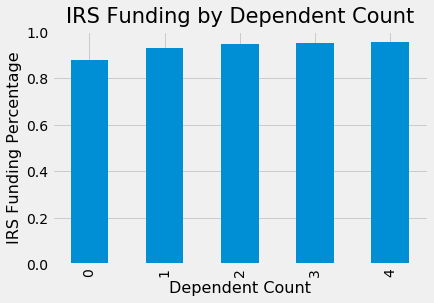

In [136]:
DependentCount = data.loc[:, ['Funded','DependentCount']]
ax = DependentCount.groupby('DependentCount').mean().plot(kind='bar')
ax.set_title('IRS Funding by Dependent Count', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Dependent Count', fontsize=16);
ax.get_legend().remove()

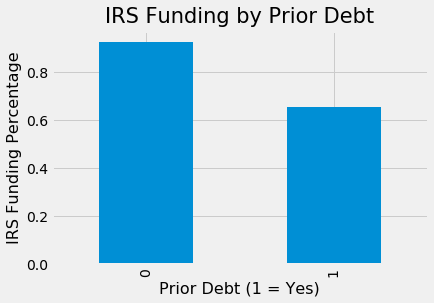

In [137]:
PYDebt = data.loc[:, ['Funded','PYDebt']]
ax = PYDebt.groupby('PYDebt').mean().plot(kind='bar')
ax.set_title('IRS Funding by Prior Debt', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Prior Debt (1 = Yes)', fontsize=16);
ax.get_legend().remove()

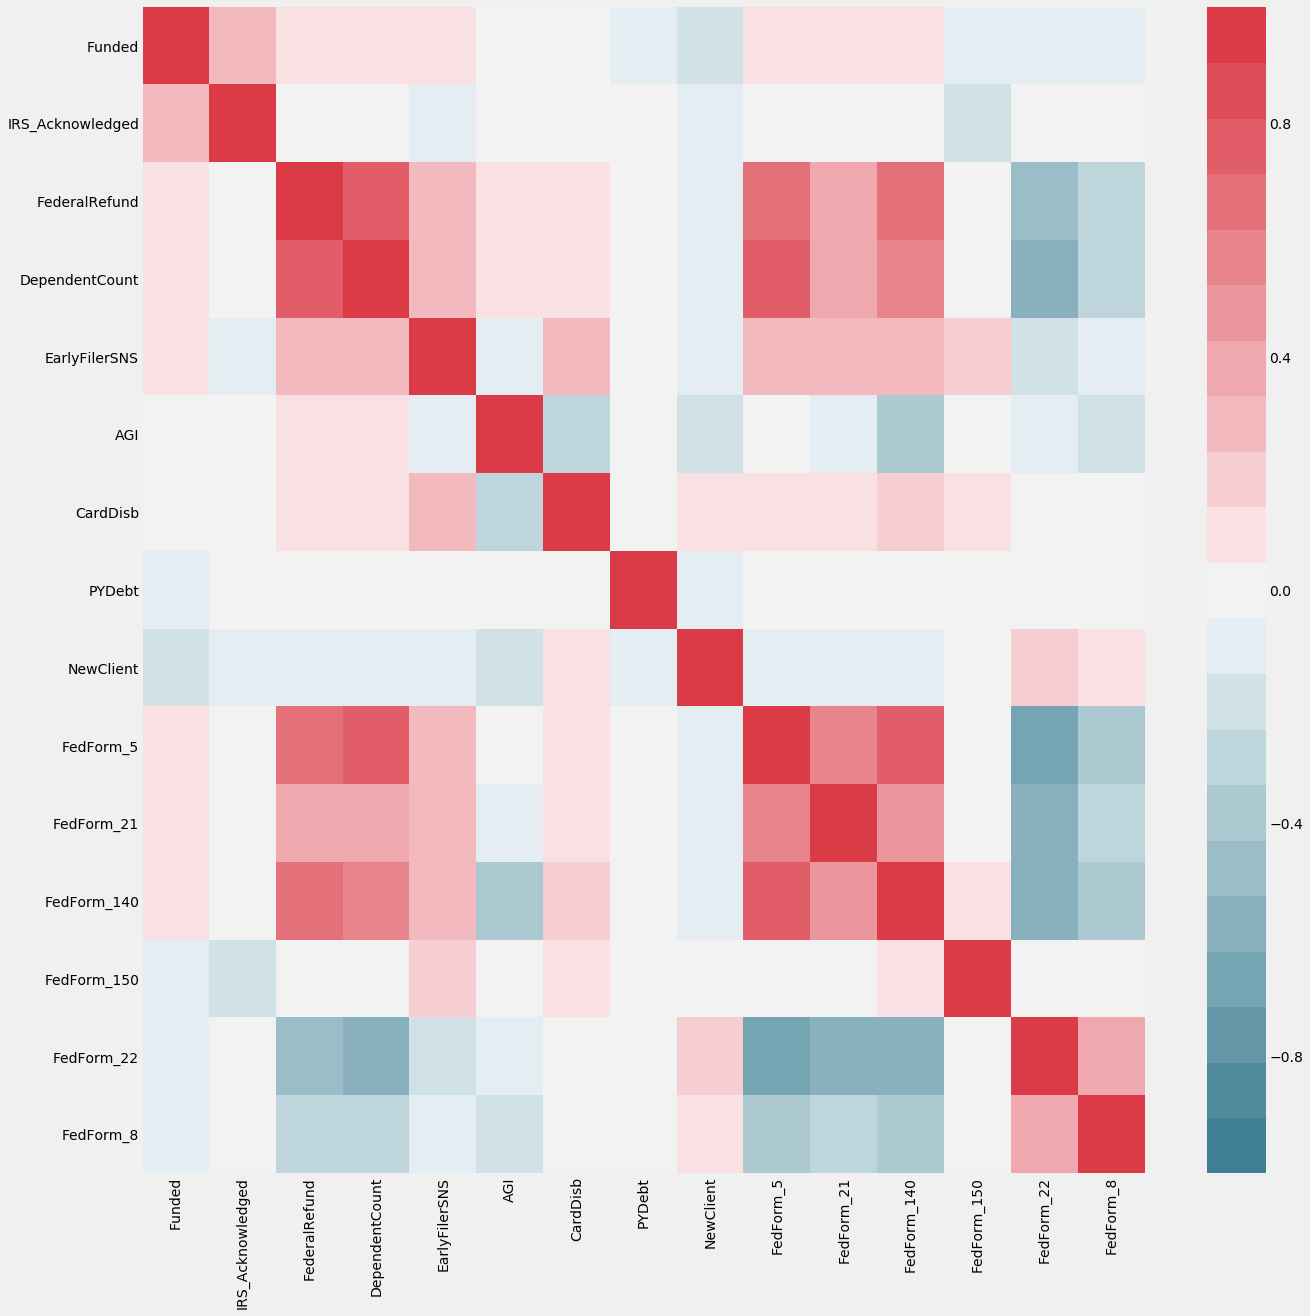

In [138]:
fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(gooddata.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

#    
#### (2) Split the data set into a training sample (75% of the dataset) and a testing holdout sample (25% of the dataset) 

In [139]:
print('Training Sample Size : ',len(y_train))
print('Test Sample Size     : ',len(y_test))

Training Sample Size :  805533
Test Sample Size     :  268511


#   
#### (3) Create a decision tree on the training sample using the correlated features

(see http://webgraphviz.com/)

#    
#### (4) Evaluate each feature's incremental explanatory power and remove any nonexplanatory features

In [140]:
pd.DataFrame({'feature': feature_cols, 'importance': tree.feature_importances_}).sort_values(by='importance')

,feature,importance
2,DependentCount,0.000000
5,CardDisb,0.000000
8,FedForm_5,0.000000
10,FedForm_140,0.000000
4,AGI,0.000287
12,FedForm_22,0.001622
9,FedForm_21,0.004227
11,FedForm_150,0.006250
13,FedForm_8,0.030590
3,EarlyFilerSNS,0.065689


#    
#### (5) Predict funding in the testing holdout sample, evaluate model accuracy against actual funding

In [141]:
print('Decision Tree accuracy score : ',tree.score(x_test,y_test))


Decision Tree accuracy score :  0.9296155464766807


#    
#### (6) Adjust number of tree's decisions (or branches) to identify the most accurate count

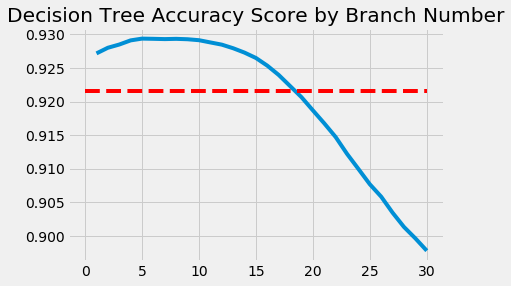

In [142]:
ax = plt.plot(  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
            [0.927157547,0.927995501,0.928475928,0.929094153,0.92935485,0.929325056,0.929284089,0.929321331,
            0.929261743,0.929120222,0.928788765,0.928461031,0.927924741,0.927272998,0.92647601,0.925332668,
            0.923950974,0.922301135,0.920647571,0.91868862,0.916755738,0.914722302,0.912215887,0.909970169,
            0.907698381,0.905847433,0.903467642,0.901344824,0.899650294,0.897817966] 
        )

ax = plt.plot([0, 30], [.9215, .9215], 'r--')
ax = plt.title('Decision Tree Accuracy Score by Branch Number')

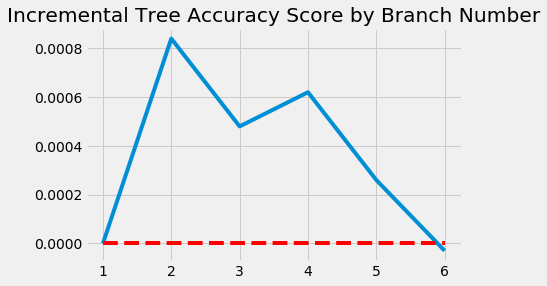

In [143]:
ax = plt.plot(  [1,2,3,4,5,6],
             [ 0,0.00084,0.00048,0.00062,0.00026,-0.00003])

ax = plt.plot([1, 6], [.0, .0], 'r--')
ax = plt.title('Incremental Tree Accuracy Score by Branch Number')

#   
# Evaluation: 
Decision tree does demonstrate improved accuracy, but by a pretty small margin (less than .1%)

In [144]:
print('Simple Average accuracy score            : ',data.loc[:,'Funded'].mean())
print('Decision Tree accuracy score             : ',tree.score(x_test,y_test))
print('Decision Tree incremental accuracy score : ',tree.score(x_test,y_test)-data.loc[:,'Funded'].mean())

Simple Average accuracy score            :  0.9215320787602742
Decision Tree accuracy score             :  0.9296155464766807
Decision Tree incremental accuracy score :  0.008083467716406445


#    
# Findings: 
The decision tree included features we anticipated, like IRS Acknowledgement and client type, but also had some surprising additions.
#  

#### Early Filers
Whether a client files early was found to be a driver of IRS funding, which was not expected.

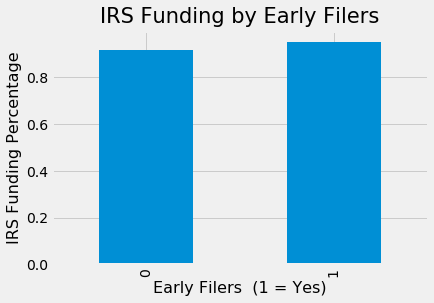

In [145]:
EarlyFilerSNS = data.loc[:, ['Funded','EarlyFilerSNS']]
ax = EarlyFilerSNS.groupby('EarlyFilerSNS').mean().plot(kind='bar')
ax.set_title('IRS Funding by Early Filers', fontsize=21, y=1.01)
ax.set_ylabel('IRS Funding Percentage', fontsize=16);
ax.set_xlabel('Early Filers  (1 = Yes)', fontsize=16);
ax.get_legend().remove()

#### Expected Federal Refund
Conceptually, we always understood that higher expected Federal refunds had more funding risk, since larger refunds are subject to greater scrutiny and audits become more likely. But, we've never identified a fixed value, which the decision tree identified as $1,821.50.

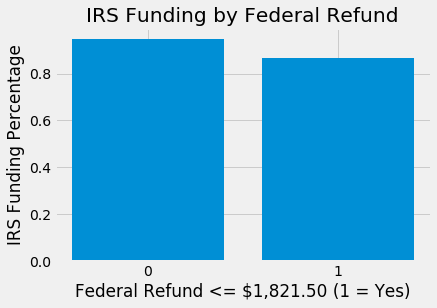

In [146]:
fedrefundvalues = [ data.loc[ data.loc[:,'FederalRefund']>1821.5, 'Funded'].mean(),
                    data.loc[ data.loc[:,'FederalRefund']<=1821.5, 'Funded'].mean()
                     ]

left = [1, 2] 
tick_label = ['0', '1'] 
  
# plotting a bar chart 
plt.bar(left, fedrefundvalues, tick_label = tick_label) 
plt.xlabel('Federal Refund <= $1,821.50 (1 = Yes)') 
plt.ylabel('IRS Funding Percentage') 
plt.title('IRS Funding by Federal Refund') 
plt.show() 

#### Form Presence
Federal form presence was underwhelming in explanatory power, indicating that 'presence alone' is not sufficient to provide insight into the client's funding likelihood. Federal form 150 was included in the decision tree, but even this form has little separation in funding rates.

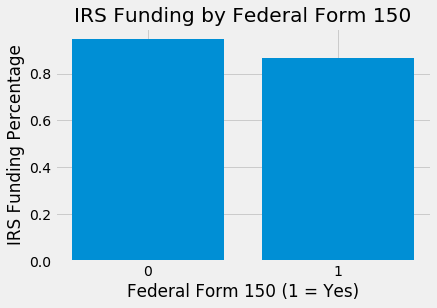

In [147]:
fedform150 = [ data.loc[ data.loc[:,'FedForm_150'] ==0, 'Funded'].mean(),
                    data.loc[ data.loc[:,'FedForm_150'] ==1, 'Funded'].mean()
                     ]

left = [1, 2] 
tick_label = ['0', '1'] 
  
# plotting a bar chart 
plt.bar(left, fedrefundvalues, tick_label = tick_label) 
plt.xlabel('Federal Form 150 (1 = Yes)') 
plt.ylabel('IRS Funding Percentage') 
plt.title('IRS Funding by Federal Form 150') 
plt.show() 

#    
# Next Steps: 
Despite the fact federal form presence demonstrated little to no explanatory power over IRS funding, I believe the line items and entries placed on those forms do have explanatory power, and that should be the next area of focus.
#  

In [148]:
%%html
<style>
div.input {
    display:none;
}
</style>